# Import some stuff

In [139]:
import randompasslib
import string
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Handy code to re-import any changes made to our helper lib

In [140]:
import randompasslib
from importlib import reload
reload(randompasslib)

<module 'randompasslib' from '/home/timcfadd/code/pysprings/lightning-talks/random-password/randompasslib.py'>

## Test how password length and complexity affect entropy

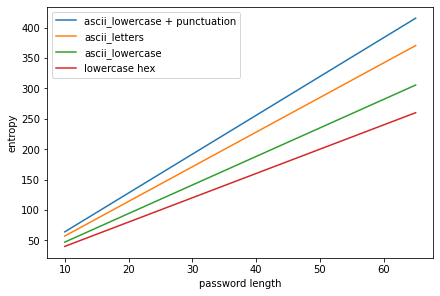

In [141]:
password_lengths = list(range(10, 66, 5))
fig, ax = plt.subplots(constrained_layout=True)
ax.set_xlabel("password length")
ax.set_ylabel("entropy")
lines = []

y, _ = randompasslib.get_xy(string.ascii_letters + string.punctuation, password_lengths)
l, = ax.plot(password_lengths, y, label='ascii_lowercase + punctuation')
lines.append(l)

y, _ = randompasslib.get_xy(string.ascii_letters, password_lengths)
l, = ax.plot(password_lengths, y, label='ascii_letters')
lines.append(l)

y, _ = randompasslib.get_xy(string.ascii_lowercase, password_lengths)
l, = ax.plot(password_lengths, y, label='ascii_lowercase')
lines.append(l)

y, _ = randompasslib.get_xy("abcdef0123456789", password_lengths)
l, = ax.plot(password_lengths, y, label='lowercase hex')
lines.append(l)

ax.legend(handles=lines, loc='upper left')

## Test how password length and complexity affect time to guess password

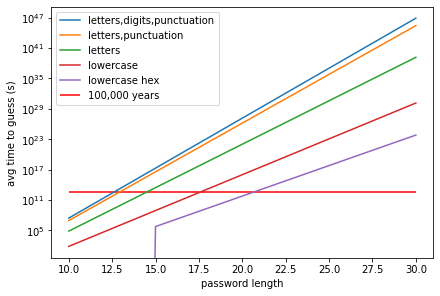

In [171]:
#guesses_per_second = 350e9  # 350B
guesses_per_second = 1e12  # 1 trillion (most I've seen is 350B)
password_lengths = list(range(10, 33, 5))
fig, ax = plt.subplots(constrained_layout=True)
ax.set_xlabel("password length")
ax.set_ylabel("avg time to guess (s)")
ax.set_yscale("log", base=10)

lines = []
_, y = randompasslib.get_xy(string.ascii_letters + string.digits + string.punctuation, password_lengths, guesses_per_second)
lines.append(
    ax.plot(password_lengths, y, label='letters,digits,punctuation')[0]
)

_, y = randompasslib.get_xy(string.ascii_letters + string.punctuation, password_lengths, guesses_per_second)
lines.append(
    ax.plot(password_lengths, y, label='letters,punctuation')[0]
)

_, y = randompasslib.get_xy(string.ascii_letters, password_lengths, guesses_per_second)
lines.append(
    ax.plot(password_lengths, y, label='letters')[0]
)
    
_, y = randompasslib.get_xy(string.ascii_lowercase, password_lengths, guesses_per_second)
lines.append(
    ax.plot(password_lengths, y, label='lowercase')[0]
)

_, y = randompasslib.get_xy("abcdef0123456789", password_lengths, guesses_per_second)
lines.append(
    ax.plot(password_lengths, y, label='lowercase hex')[0]
)

# Add a line at 100,000 years
# Add a line at 100,000 years
marker = randompasslib.SECONDS_PER_YEAR * 100_000 # 3.154e12
hmarker = ax.hlines(y=marker, xmin=min(password_lengths), xmax=max(password_lengths), colors = 'red', label='100,000 years')
lines.append(hmarker)

# ax.legend(handles=[line1, line2, line3, line4, line5, year], loc='upper left')
ax.legend(handles=lines, loc='upper left')

## Test how increases in technology affect avg time to guess password

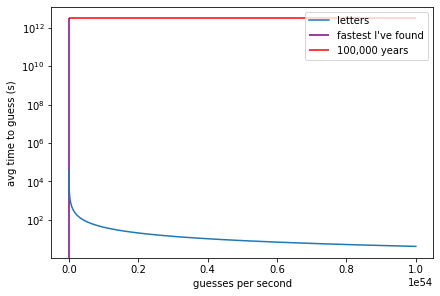

In [172]:
# guesses_per_second = np.arange(1e10, 1e13, 1e10)
guesses_per_second = np.arange(1e50, 1e54, 1e50)  # <-- that's rediculous
choices = string.ascii_letters
password_length = 32

# Calculate number of seconds to guess a password based on guesses per second
y_values = []
for gps in guesses_per_second:
    y_values.append(
        randompasslib.seconds_to_crack(password_length, len(choices), gps)
    )
y_values = np.array(y_values, dtype=float)

fig, ax = plt.subplots(constrained_layout=True)
ax.set_xlabel("guesses per second")
ax.set_ylabel("avg time to guess (s)")
ax.set_yscale("log", base=10)

# Add a line at 100,000 years
marker = randompasslib.SECONDS_PER_YEAR * 100_000 # 3.154e12
hmarker = ax.hlines(y=marker, xmin=0, xmax=max(guesses_per_second), colors = 'red', label='100,000 years')

# Add a line at 350B guesses per second
x = 350_000_000_000
max_limit = ax.vlines(x = x, ymin = 0, ymax = max(y_values + [marker]), 
           colors = 'purple', 
           label = "fastest I've found") 

# Plot our data
line, = ax.plot(guesses_per_second, y_values, label='letters')

ax.legend(handles=[line, max_limit, hmarker], loc='upper right')